#Name->Ansh Sahu
# Roll_No- 22CS30010

:* Part B: K-Means Clustering- Anuran Calls Dataset (MFCCs)*

** Problem Statement:
   You are provided with a dataset of frog species based on their sound frequencies (MFCCs).
   Your task is to apply advanced clustering techniques, starting with K-Means, to group the
   frogs into clusters based on their acoustic features and explore clustering performance using
   additional evaluation methods.**

In [3]:
# Importing the necessary libraries
# pandas: for data manipulation and analysis
# numpy: for numerical operations, especially with arrays
# matplotlib.pyplot: for creating static, interactive visualizations
# seaborn: for statistical data visualization based on matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# EDA(Explonatory Data Analysis)

*In this step, we load the dataset, check for missing values, and conduct initial exploratory data analysis (EDA) to understand the distribution and relationships within the data.*

In [4]:
# Load the data from a CSV file into a pandas DataFrame
# The file is located at the specified path ('/content/Frogs_MFCCs.csv')
# df will contain the data in a structured format with rows and columns
df = pd.read_csv('/content/Frogs_MFCCs.csv')

# Display the first few rows of the DataFrame
# df.head() shows the first 5 rows by default, helping us get an overview of the data structure,
# including the column names and initial values for each column
df.head()


,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [5]:
# Display a random sample of 10 rows from the DataFrame
# df.sample(10) selects 10 random rows, giving a different subset of the dataset each time it is run
# This is useful for observing a variety of entries and better understanding the range and diversity of the data
df.sample(10)


,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
6268,1.0,0.598922,0.439918,0.216910,-0.004457,0.163179,0.077328,-0.022633,0.130730,0.075634,...,-0.017055,0.008260,0.036975,-0.043621,-0.009152,0.064962,Hylidae,Hypsiboas,HypsiboasCordobae,42
778,1.0,-0.175499,0.143653,0.602973,0.136911,-0.066209,0.026864,-0.002143,0.059232,0.099365,...,-0.099357,0.010353,0.108944,-0.004053,-0.089873,-0.001179,Dendrobatidae,Ameerega,Ameeregatrivittata,10
1885,1.0,0.279626,0.198776,0.613131,0.219883,0.040665,-0.009912,0.046903,0.117817,0.060556,...,0.212914,0.171154,-0.034884,-0.147983,0.032778,0.239335,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,16
4012,1.0,0.497236,0.232258,0.507129,0.147941,-0.011221,-0.137436,0.048249,0.216347,0.001061,...,0.089730,-0.015021,-0.076304,-0.135409,0.046354,0.209751,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,23
184,1.0,0.174329,-0.039559,0.122348,0.215474,0.163601,0.090390,0.025010,0.074301,0.141414,...,-0.016313,-0.125216,-0.124495,0.037722,0.096295,-0.006377,Leptodactylidae,Adenomera,AdenomeraAndre,4
782,1.0,-0.096100,-0.039274,0.466894,0.321853,0.113572,-0.112985,-0.131729,0.154069,0.166076,...,-0.151053,-0.008599,0.028349,-0.037566,-0.040113,0.043119,Dendrobatidae,Ameerega,Ameeregatrivittata,10
869,1.0,0.336052,-0.038032,0.268865,0.507220,0.181038,-0.270409,-0.055195,0.209383,0.234424,...,-0.184442,-0.031853,0.156241,-0.019947,-0.094316,-0.024885,Dendrobatidae,Ameerega,Ameeregatrivittata,11
3388,1.0,0.163939,0.096056,0.513367,0.236897,0.067304,-0.119411,0.015516,0.228380,0.083844,...,0.266208,0.137524,-0.056241,-0.192929,-0.060608,0.198876,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,21
2970,1.0,0.379501,0.128494,0.768611,0.373980,0.013767,-0.213201,0.069020,0.268577,0.108703,...,0.048995,0.143774,0.006194,-0.192198,-0.124440,0.196393,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,20
3392,1.0,0.088278,0.040227,0.452768,0.230798,0.092593,-0.120504,-0.015187,0.239874,0.096095,...,0.255086,0.080837,-0.127455,-0.256067,-0.064100,0.217187,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,21


In [6]:
# Inspect the data types and null values in the DataFrame
# df.info() provides a concise summary of the DataFrame, including:
# - The index range and number of entries
# - The name and data type of each column
# - The number of non-null values per column
# This method helps quickly identify the structure of the dataset, data types, and if any column has missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MFCCs_ 1  7195 non-null   float64
 1   MFCCs_ 2  7195 non-null   float64
 2   MFCCs_ 3  7195 non-null   float64
 3   MFCCs_ 4  7195 non-null   float64
 4   MFCCs_ 5  7195 non-null   float64
 5   MFCCs_ 6  7195 non-null   float64
 6   MFCCs_ 7  7195 non-null   float64
 7   MFCCs_ 8  7195 non-null   float64
 8   MFCCs_ 9  7195 non-null   float64
 9   MFCCs_10  7195 non-null   float64
 10  MFCCs_11  7195 non-null   float64
 11  MFCCs_12  7195 non-null   float64
 12  MFCCs_13  7195 non-null   float64
 13  MFCCs_14  7195 non-null   float64
 14  MFCCs_15  7195 non-null   float64
 15  MFCCs_16  7195 non-null   float64
 16  MFCCs_17  7195 non-null   float64
 17  MFCCs_18  7195 non-null   float64
 18  MFCCs_19  7195 non-null   float64
 19  MFCCs_20  7195 non-null   float64
 20  MFCCs_21  7195 non-null   floa

In [7]:
# Generate descriptive statistics for numerical columns
# df.describe() provides key summary statistics for each numerical column, including:
# - Count: Number of non-null entries in each column
# - Mean: Average value of each column
# - Std: Standard deviation, measuring spread of values
# - Min: Minimum value in each column
# - 25%, 50%, 75%: Percentiles, showing data distribution at each quarter
# - Max: Maximum value in each column
# This helps in understanding the distribution, range, and spread of data
df.describe()


,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,RecordID
count,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,...,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000
mean,0.989885,0.323584,0.311224,0.445997,0.127046,0.097939,-0.001397,-0.000370,0.128213,0.055998,...,-0.039244,-0.101748,0.042062,0.088680,0.007755,-0.049474,-0.053244,0.037313,0.087567,25.220014
std,0.069016,0.218653,0.263527,0.160328,0.162722,0.120412,0.171404,0.116302,0.179008,0.127099,...,0.152515,0.187618,0.119915,0.138055,0.084733,0.082546,0.094181,0.079470,0.123442,13.214399
min,-0.251179,-0.673025,-0.436028,-0.472676,-0.636012,-0.410417,-0.538982,-0.576506,-0.587313,-0.952266,...,-0.590380,-0.717156,-0.498675,-0.421480,-0.759322,-0.680745,-0.361649,-0.430812,-0.379304,1.000000
25%,1.000000,0.165945,0.138445,0.336737,0.051717,0.012581,-0.125737,-0.063109,0.004648,-0.001132,...,-0.132980,-0.255929,-0.019549,-0.001764,-0.042122,-0.106079,-0.120971,-0.017620,0.000533,15.000000
50%,1.000000,0.302184,0.274626,0.481463,0.161361,0.072079,-0.052630,0.013265,0.189317,0.063478,...,-0.050715,-0.143259,0.041081,0.112769,0.011820,-0.052626,-0.055180,0.031274,0.105373,22.000000
75%,1.000000,0.466566,0.430695,0.559861,0.222592,0.175957,0.085580,0.075108,0.265395,0.117725,...,0.039157,0.017348,0.107046,0.201932,0.061889,0.006321,0.001342,0.089619,0.194819,37.000000
max,1.000000,1.000000,1.000000,1.000000,0.752246,0.964240,1.000000,0.551762,0.738033,0.522768,...,0.575749,0.668924,0.670700,0.681157,0.614064,0.574209,0.467831,0.389797,0.432207,60.000000


In [8]:
# Check for missing values in the dataset
# df.isnull().sum() shows the total count of missing values for each column.
# - df.isnull() creates a DataFrame with True values where data is missing (NaN) and False where data is present.
# - .sum() calculates the total number of missing values for each column by summing up the True values (considered as 1).
# This is useful to identify any columns with missing data that may need handling (e.g., imputation, removal).
df.isnull().sum()


,0
MFCCs_ 1,0
MFCCs_ 2,0
MFCCs_ 3,0
MFCCs_ 4,0
MFCCs_ 5,0
MFCCs_ 6,0
MFCCs_ 7,0
MFCCs_ 8,0
MFCCs_ 9,0
MFCCs_10,0


**Visualizing distributions of the MFCC features**

In [9]:
# Display the names of all columns in the dataset
# - df.columns returns an Index object containing the column names of the DataFrame.
# This is helpful for understanding the structure of the data, as it shows the available features
# and can aid in selecting or renaming columns if needed for further analysis.
df.columns


Index(['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6',
       'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12',
       'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18',
       'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22', 'Family', 'Genus',
       'Species', 'RecordID'],
      dtype='object')

<Axes: xlabel='Family'>

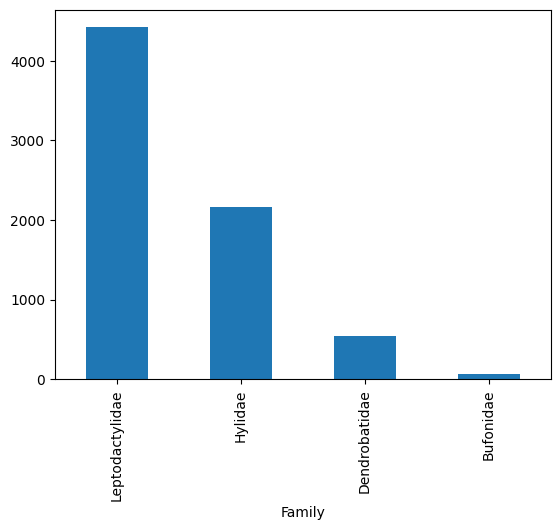

In [10]:
# Plot the frequency of each unique value in the 'Family' column as a bar chart
# - df['Family'].value_counts() calculates the count of each unique category in the 'Family' column.
# - .plot(kind='bar') generates a bar plot to visually display these counts.
# This visualization helps us understand the distribution of different 'Family' values in the dataset,
# allowing us to see which families are more common or less common.
df['Family'].value_counts().plot(kind='bar')


<Axes: xlabel='Genus'>

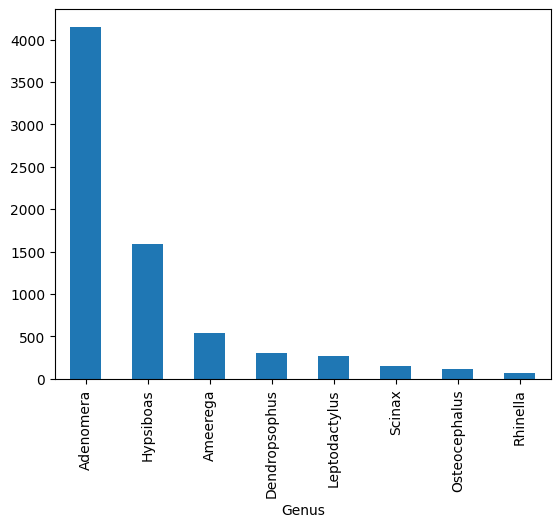

In [11]:
# Plot the frequency of each unique value in the 'Genus' column as a bar chart
# - df['Genus'].value_counts() computes the count of occurrences for each unique genus in the 'Genus' column.
# - .plot(kind='bar') creates a bar chart to visually represent these counts.
# This visualization aids in understanding the distribution of different genera present in the dataset,
# highlighting which genera are more prevalent or less prevalent among the frog samples.
df['Genus'].value_counts().plot(kind='bar')


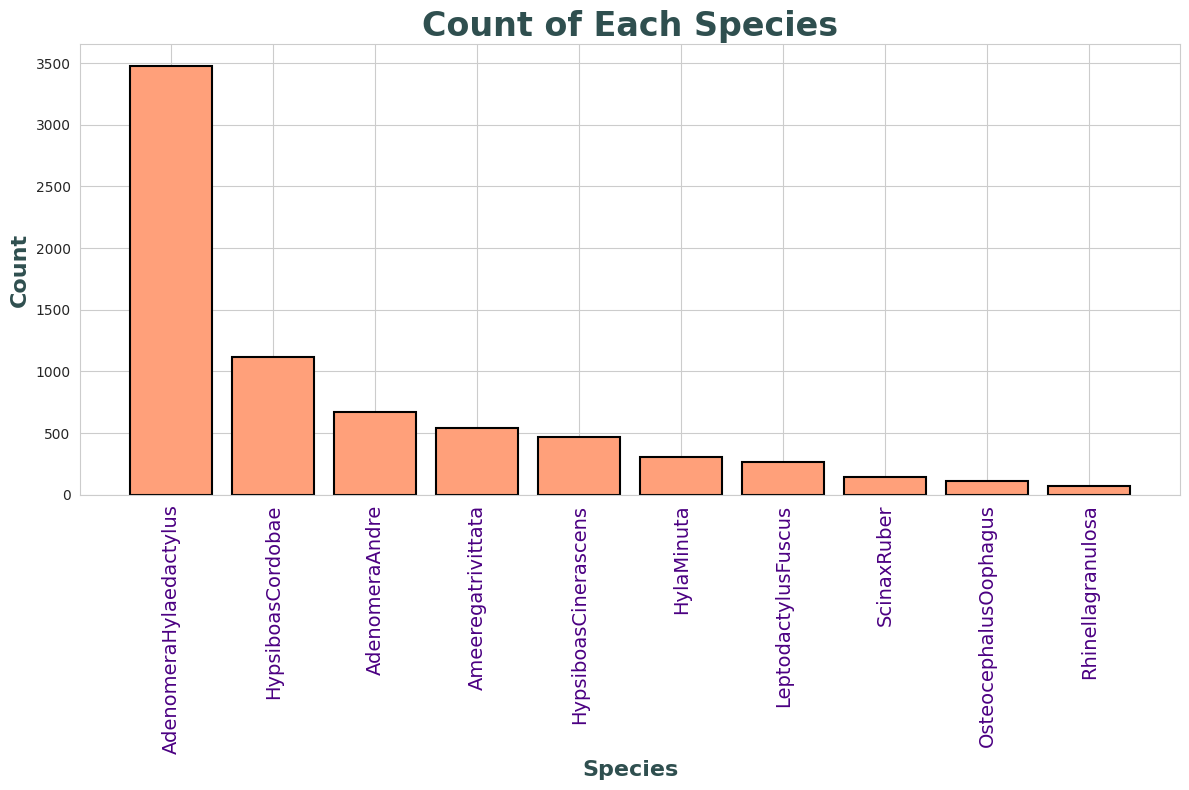

In [12]:
# Set the style of seaborn plots to 'whitegrid' for a cleaner look with a grid background
sns.set_style('whitegrid')

# Calculate the count of occurrences for each unique species in the 'Species' column
species_counts = df['Species'].value_counts()

# Create a new figure for the bar chart with a specified size
plt.figure(figsize=(12, 8))  # Increased figure size for better visibility

# Create a bar chart to display the count of each species
bars = plt.bar(species_counts.index, species_counts.values, color='#FFA07A', edgecolor='black', linewidth=1.5)  # Changed bar color to Light Salmon

# Set the title of the plot with specific font size, weight, and color
plt.title('Count of Each Species', fontsize=24, fontweight='bold', color='#2F4F4F')  # Changed title font size and color to Dark Slate Gray

# Label the x-axis with specified font size, weight, and color
plt.xlabel('Species', fontsize=16, fontweight='bold', color='#2F4F4F')  # Changed x-axis font size and color

# Label the y-axis with specified font size, weight, and color
plt.ylabel('Count', fontsize=16, fontweight='bold', color='#2F4F4F')  # Changed y-axis font size and color

# Rotate the x-axis labels by 90 degrees for better readability, especially if there are many species
plt.xticks(rotation=90, fontsize=14, color='#4B0082')  # Changed x-axis label font size and color to Indigo

# Adjust the layout to ensure all elements fit nicely within the figure
plt.tight_layout()

# Display the bar chart
plt.show()


*disribution plots*

<ipython-input-16-7261fd5d4b62>:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  axes = df.iloc[:, :-4].hist(ax=axes, bins=20, color='lightcoral', edgecolor='black', linewidth=1.2)  # Changed histogram color to Light Coral


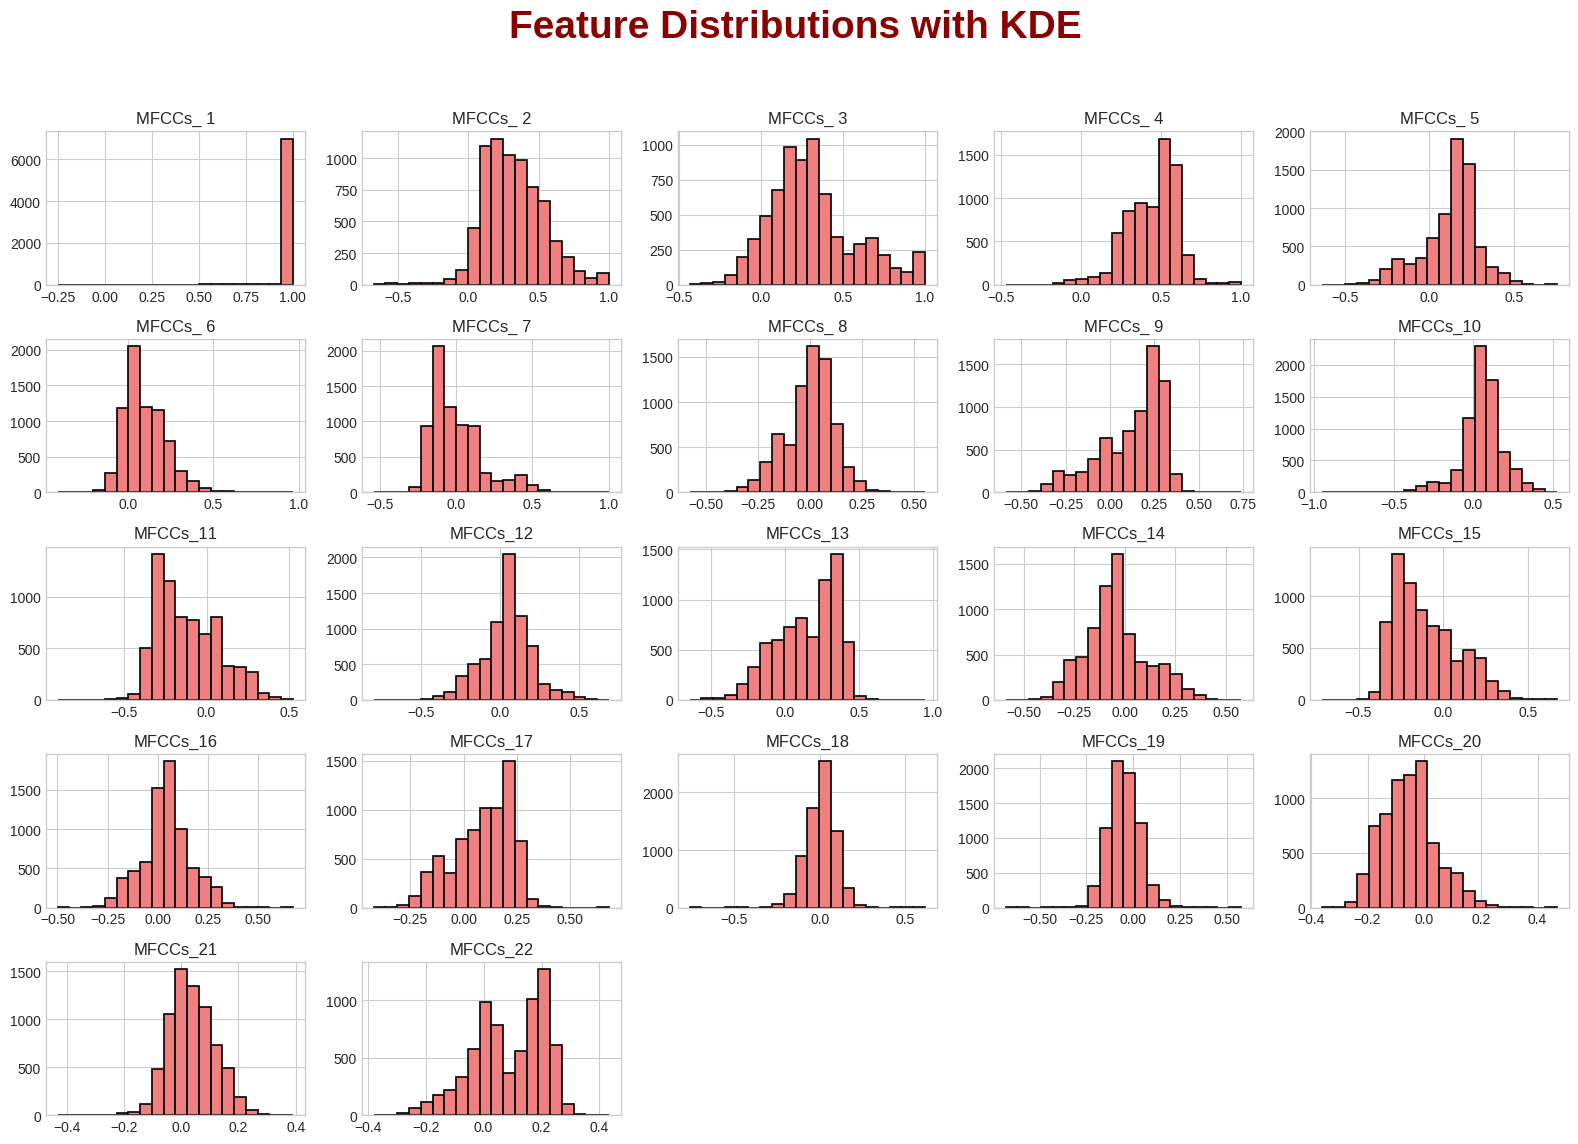

In [16]:
# Use the 'seaborn-v0_8-whitegrid' style for improved aesthetics
plt.style.use('seaborn-v0_8-whitegrid')

# Create a figure and a set of subplots, specifying the overall figure size
fig, axes = plt.subplots(figsize=(16, 12))

# Generate histograms for each feature in the DataFrame, excluding the last four columns
axes = df.iloc[:, :-4].hist(ax=axes, bins=20, color='lightcoral', edgecolor='black', linewidth=1.2)  # Changed histogram color to Light Coral

# Set the main title for the entire figure with specified font size and color
plt.suptitle('Feature Distributions with KDE', fontsize=28, fontweight='bold', color='darkred')  # Changed title color to Dark Red

# Loop through each subplot (axis) to customize titles and add lines for mean and median
for ax in axes.flatten():
    xlabel = ax.get_xlabel()  # Get the label for the x-axis

    # Check if xlabel is not empty before proceeding
    if xlabel:
        # Set the x-axis label with increased font size
        ax.set_xlabel(xlabel, fontsize=16, fontweight='bold')  # Increased font size
        ax.set_ylabel('Frequency', fontsize=16, fontweight='bold')  # Increased font size for y-axis
        ax.set_title(ax.get_title(), fontsize=18, fontweight='bold')  # Increased font size for title

        # Calculate the mean of the current feature and add a vertical line for it
        mean_value = df[xlabel].mean()
        ax.axvline(mean_value, color='lightcoral', linestyle='--', linewidth=2, label='Mean')  # Mean line in Light Coral

        # Calculate the median of the current feature and add a vertical line for it
        median_value = df[xlabel].median()
        ax.axvline(median_value, color='salmon', linestyle='--', linewidth=2, label='Median')  # Median line in Salmon

        # Add a legend to the subplot
        ax.legend()

        # Overlay a Kernel Density Estimate (KDE) plot on the histogram for better visualization
        sns.kdeplot(df[xlabel], ax=ax, color='lightpink', linewidth=2, linestyle='-', label='KDE', alpha=0.7)  # KDE line in Light Pink

# Adjust the layout to ensure everything fits nicely and does not overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plots
plt.show()


**skewness--Skewness is a statistical measure that quantifies the asymmetry of a probability distribution about its mean**

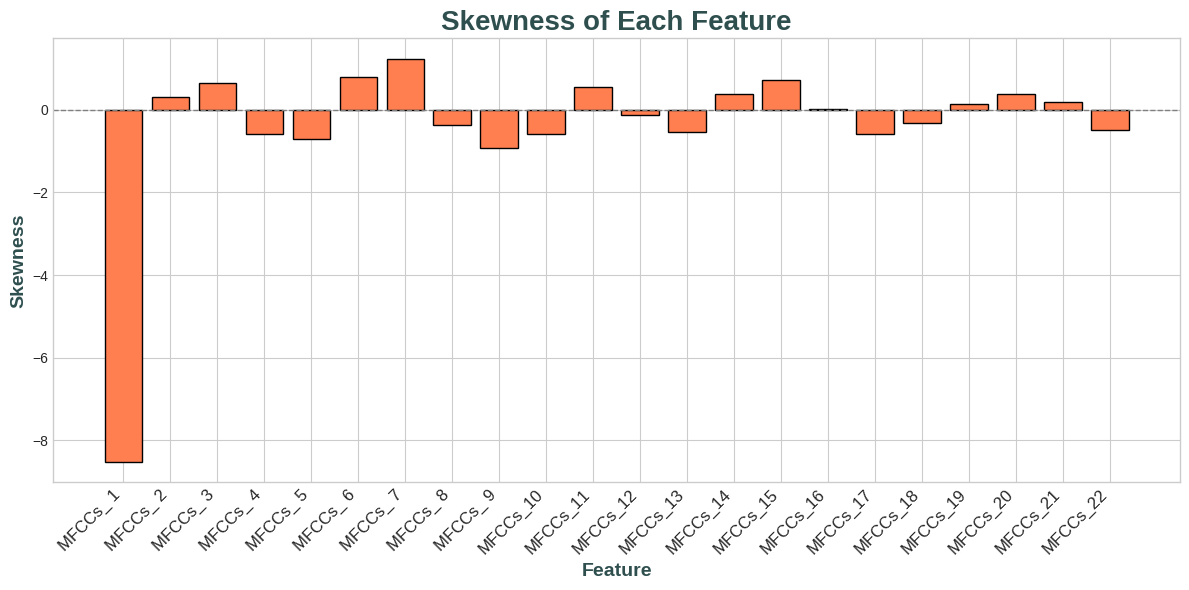

In [17]:
# Calculate skewness for each feature in the DataFrame, excluding the last four columns
skewness_values = df.iloc[:, :-4].skew()

# Create a new figure for the skewness bar chart
plt.figure(figsize=(12, 6))

# Create a bar plot to visualize the skewness of each feature
plt.bar(skewness_values.index, skewness_values, color='#FF7F50', edgecolor='black')  # Changed bar color to Coral

# Add a horizontal line at y=0 for reference
plt.axhline(0, color='grey', linewidth=1, linestyle='--')  # Changed line color to grey and made it dashed

# Set the title and labels with increased font size and emphasis
plt.title('Skewness of Each Feature', fontsize=20, fontweight='bold', color='#2F4F4F')  # Changed title color to Dark Slate Gray
plt.xlabel('Feature', fontsize=14, fontweight='bold', color='#2F4F4F')  # Changed label color
plt.ylabel('Skewness', fontsize=14, fontweight='bold', color='#2F4F4F')  # Changed label color

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)  # Increased font size for better readability

# Adjust the layout to prevent overlap and ensure elements fit well in the figure
plt.tight_layout()

# Display the skewness bar chart
plt.show()


**box plot for outlier detection**

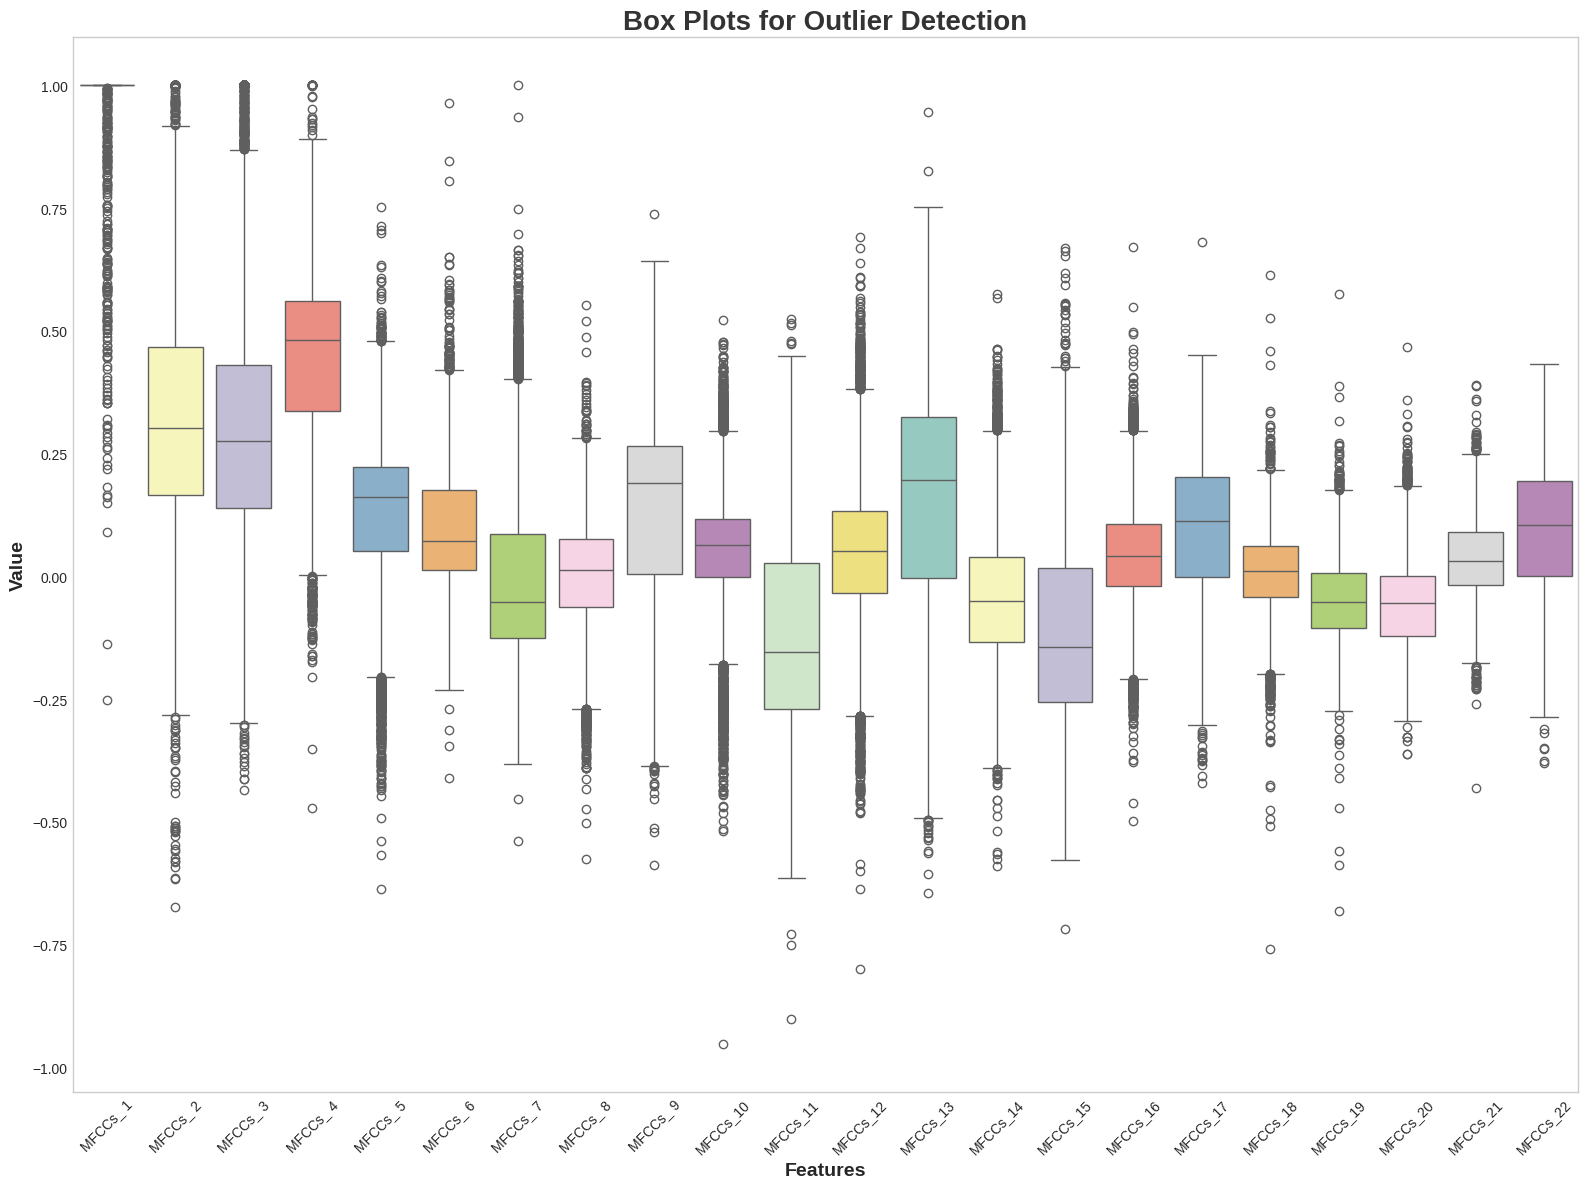

In [18]:
# Selecting all columns except the last four from the DataFrame
data = df.iloc[:, :-4]  # Create a new DataFrame containing all features except the last four columns

def detect_outliers_iqr(data):
    """
    Detects outliers in the DataFrame using the Interquartile Range (IQR) method.

    Parameters:
        data (DataFrame): The input data from which to detect outliers.

    Returns:
        dict: A dictionary containing column names as keys and a list of outlier indices as values.
    """
    outliers_dict = {}  # Initialize an empty dictionary to store outlier indices for each column
    for col in data.columns:  # Iteration over each column in the DataFrame
        Q1 = data[col].quantile(0.25)  # Calculating the first quartile (25th percentile)
        Q3 = data[col].quantile(0.75)  # Calculating the third quartile (75th percentile)
        IQR = Q3 - Q1  # Computing the Interquartile Range (IQR)

        # Define lower and upper bounds for outlier detection
        lower_bound = Q1 - 1.5 * IQR  # Lower bound for detecting outliers
        upper_bound = Q3 + 1.5 * IQR  # Upper bound for detecting outliers

        # Identify outliers based on the defined bounds
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]  # Boolean indexing to find outliers

        outliers_dict[col] = outliers.index.tolist()  # Store the indices of outliers in the dictionary with column names as keys

    return outliers_dict  # Return the dictionary containing outlier indices for each column

# Detecting outliers in the dataset
outliers = detect_outliers_iqr(data)  # Call the function to detect outliers and store the result

# Visualizing outliers using box plots
plt.figure(figsize=(16, 12))  # Create a new figure with specified size
sns.boxplot(data=data, palette="Set3")  # Create box plots for the data using a specific color palette
plt.title('Box Plots for Outlier Detection', fontsize=20, fontweight='bold', color='#333333')  # Set title with styling
plt.xlabel('Features', fontsize=14, fontweight='bold')  # Set x-axis label with styling
plt.ylabel('Value', fontsize=14, fontweight='bold')  # Set y-axis label with styling
plt.xticks(rotation=45)  # Rotate x-axis tick labels for better readability
plt.grid(False)  # Disable grid lines for clarity
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the box plots


**Data Scaling**

*Scaling is essential for clustering algorithms to ensure that each feature contributes equally. Here, we’ll use standardization to scale the MFCC features, converting them to a mean of 0 and a standard deviation of 1.*

In [19]:
# Feature Scaling (Standardization)
from sklearn.preprocessing import StandardScaler  # Import StandardScaler from sklearn.preprocessing

# Create an instance of StandardScaler
scaler = StandardScaler()  # Initialize the scaler to standardize features

# Fit the scaler to the data and transform it
scaled_features = scaler.fit_transform(df.iloc[:, :-4])  # Scale all features except the last four columns


***Feature Engineering***

In [20]:
from sklearn.preprocessing import PolynomialFeatures  # Import PolynomialFeatures from sklearn.preprocessing

# Create an instance of PolynomialFeatures with specific parameters
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
# 'degree=2' specifies that we want to generate polynomial features up to the second degree.
# 'interaction_only=True' means we will only include interaction terms (products of features) and not polynomial terms of individual features.
# 'include_bias=False' indicates that we do not want to add a bias (constant) column to the features.

# Transform the scaled features to generate polynomial features
polynomial_features = poly.fit_transform(scaled_features)
# This applies the polynomial feature generation to the scaled features and stores the result in 'polynomial_features'.
# The resulting array will contain the original features, their interactions, and no individual squared terms.


**correlation analysis**

* Correlation analysis helps identify redundant features. By removing highly correlated features, we can reduce redundancy and potentially improve clustering performance.*

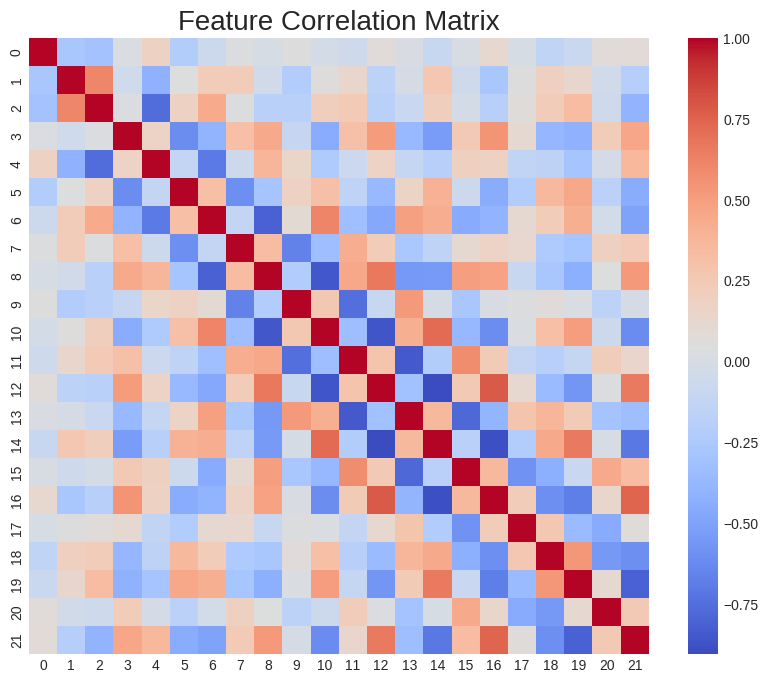

Removed high-correlation features: {14}
Remaining features shape: (7195, 21)


In [21]:
# Calculate the correlation matrix for the scaled features
corr_matrix = pd.DataFrame(scaled_features).corr()  # Create a DataFrame from the scaled features and compute the correlation

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))  # Set the size of the plot
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')  # Create a heatmap; no annotations for the cell values, color map is 'coolwarm'
plt.title('Feature Correlation Matrix', fontsize=20)  # Set the title of the plot
plt.show()  # Display the plot

# Define a threshold for identifying highly correlated features
threshold = 0.9  # Set the correlation threshold
high_corr_features = set()  # Initialize a set to keep track of features to be removed due to high correlation

# Loop through the correlation matrix to identify features with a correlation above the threshold
for i in range(len(corr_matrix.columns)):
    for j in range(i):  # Loop through each pair of features
        if abs(corr_matrix.iloc[i, j]) > threshold:  # Check if the absolute correlation exceeds the threshold
            colname = corr_matrix.columns[i]  # Get the column name of the current feature
            high_corr_features.add(colname)  # Add to the set of features to remove

# Remove the identified highly correlated features from the dataset
reduced_features = pd.DataFrame(scaled_features).drop(columns=high_corr_features)  # Create a new DataFrame without the high-correlation features

# Output the results of the feature removal
print("Removed high-correlation features:", high_corr_features)  # Print the features that were removed
print("Remaining features shape:", reduced_features.shape)  # Print the shape of the DataFrame after removing features


# **K-Means Clustering**

**Elbow Method**

*The Elbow Method helps determine the optimal number of clusters by plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters.*

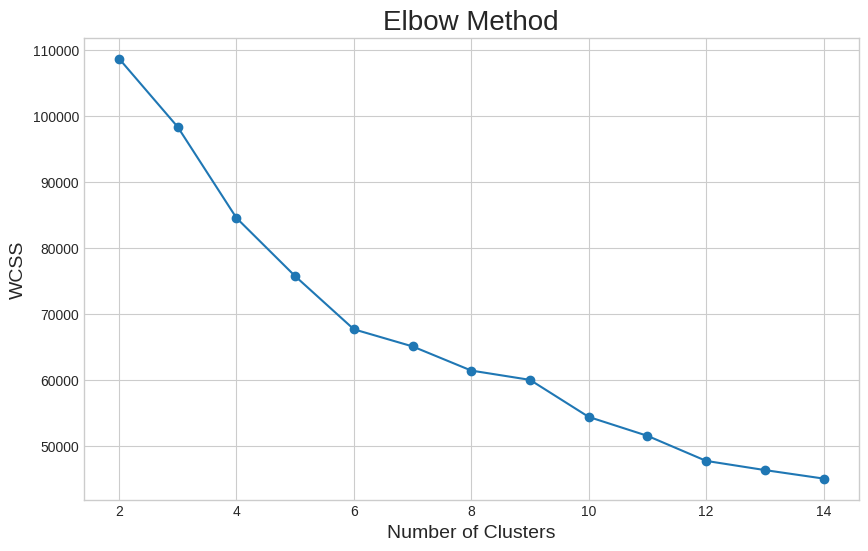

In [22]:
from sklearn.cluster import KMeans  # Import KMeans clustering from sklearn

# Initialize a list to hold the Within-Cluster Sum of Squares (WCSS) values
wcss = []

# Loop over a range of possible cluster counts (from 2 to 14)
for i in range(2, 15):
    # Create a KMeans instance with the current number of clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=10)  # Use 'k-means++' for smarter centroid initialization

    # Fit the KMeans model to the scaled features
    kmeans.fit(scaled_features)  # Perform the clustering
    wcss.append(kmeans.inertia_)  # Append the WCSS value to the list

# Plot the Elbow Curve to visualize WCSS against the number of clusters
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.plot(range(2, 15), wcss, marker='o', linestyle='-')  # Plot WCSS values with markers
plt.title('Elbow Method', fontsize=20)  # Title of the plot with increased font size
plt.xlabel('Number of Clusters', fontsize=14)  # X-axis label with increased font size
plt.ylabel('WCSS', fontsize=14)  # Y-axis label with increased font size
plt.grid(True)  # Optional: Add grid for better readability
plt.show()  # Display the plot
1q

**Silhouette Score Evaluation**

* The silhouette score evaluates clustering quality. It measures how similar an object is to its cluster compared to other clusters.  If the Silhouette Score is high, it indicates that the data points within each cluster are well separated from other clusters and closely grouped within their own clusters.*

In [25]:
from sklearn.metrics import silhouette_score  # Import the silhouette score function

# Define the optimal number of clusters determined from the Elbow Method
optimal_k = 4

# Initialize KMeans with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=10)

# Fit the model and predict cluster labels for the scaled features
cluster_labels = kmeans.fit_predict(scaled_features)

# Calculate the silhouette score to evaluate the clustering quality
silhouette_avg = silhouette_score(scaled_features, cluster_labels)

# Print the average silhouette score for the chosen number of clusters
print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg:.4f}')  # Format the output to 4 decimal places



Silhouette Score for 4 clusters: 0.3594


**Cluster Initialization  comparison**

*K-Means initialization impacts convergence speed and clustering quality. We compare k-means++ (default) with random initialization.*

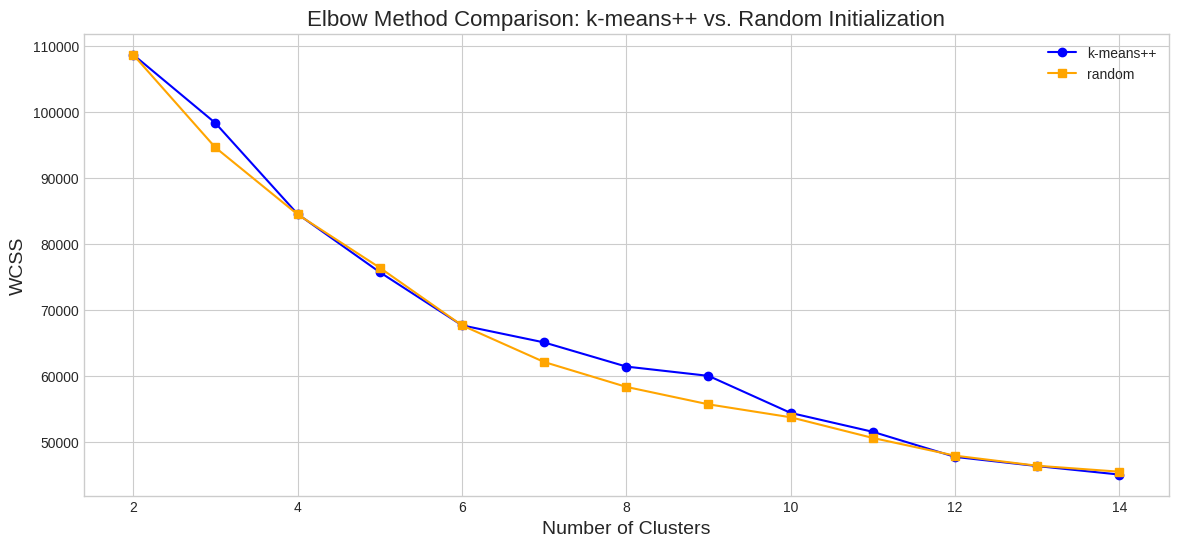

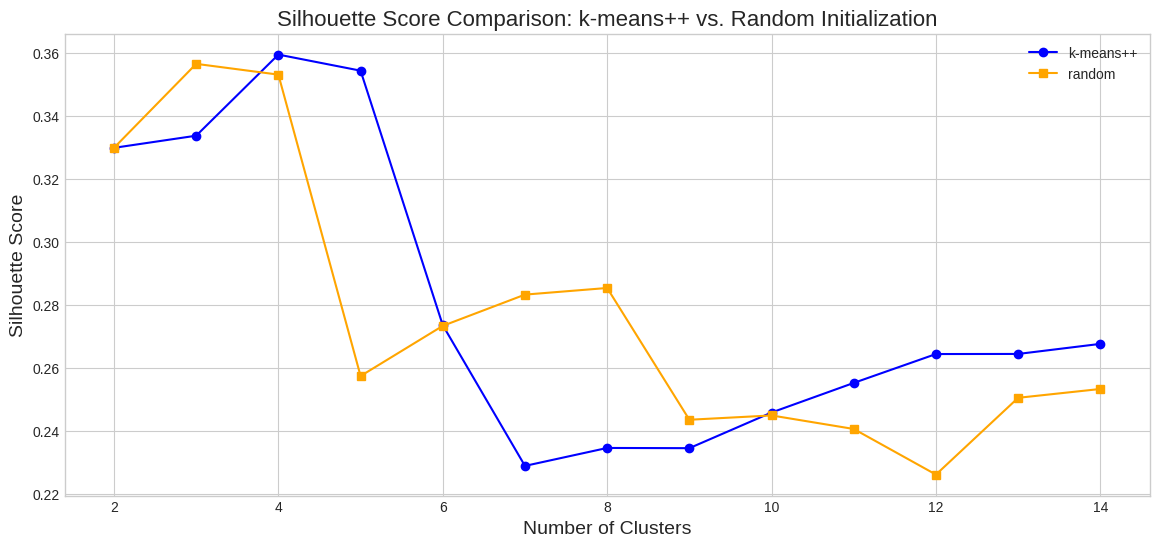

Silhouette Score with k-means++ for 4 clusters: 0.3594
Silhouette Score with random for 4 clusters: 0.3530


In [26]:
# Initialize lists to store results for both initialization methods
wcss_kmeans_plus = []    # List to store WCSS values for k-means++ initialization
wcss_random = []         # List to store WCSS values for random initialization
silhouette_kmeans_plus = []  # List to store silhouette scores for k-means++ initialization
silhouette_random = []    # List to store silhouette scores for random initialization

# Define the range of clusters to evaluate
cluster_range = range(2, 15)

# Evaluate both KMeans initialization methods for the defined cluster range
for i in cluster_range:
    # KMeans with k-means++ initialization
    kmeans_plus = KMeans(n_clusters=i, init='k-means++', random_state=10)
    labels_plus = kmeans_plus.fit_predict(scaled_features)  # Fit model and predict cluster labels
    wcss_kmeans_plus.append(kmeans_plus.inertia_)  # Append WCSS value
    silhouette_kmeans_plus.append(silhouette_score(scaled_features, labels_plus))  # Append silhouette score

    # KMeans with random initialization
    kmeans_random = KMeans(n_clusters=i, init='random', random_state=10)
    labels_random = kmeans_random.fit_predict(scaled_features)  # Fit model and predict cluster labels
    wcss_random.append(kmeans_random.inertia_)  # Append WCSS value
    silhouette_random.append(silhouette_score(scaled_features, labels_random))  # Append silhouette score

# Plotting WCSS for both initialization methods to visualize the Elbow Method
plt.figure(figsize=(14, 6))
plt.plot(cluster_range, wcss_kmeans_plus, marker='o', label='k-means++', color='blue')  # Plot WCSS for k-means++
plt.plot(cluster_range, wcss_random, marker='s', label='random', color='orange')  # Plot WCSS for random initialization
plt.title('Elbow Method Comparison: k-means++ vs. Random Initialization', fontsize=16)  # Title for the plot
plt.xlabel('Number of Clusters', fontsize=14)  # X-axis label
plt.ylabel('WCSS', fontsize=14)  # Y-axis label
plt.legend()  # Show legend
plt.show()  # Display the plot

# Plotting Silhouette Scores for both initialization methods
plt.figure(figsize=(14, 6))
plt.plot(cluster_range, silhouette_kmeans_plus, marker='o', label='k-means++', color='blue')  # Plot silhouette scores for k-means++
plt.plot(cluster_range, silhouette_random, marker='s', label='random', color='orange')  # Plot silhouette scores for random initialization
plt.title('Silhouette Score Comparison: k-means++ vs. Random Initialization', fontsize=16)  # Title for the plot
plt.xlabel('Number of Clusters', fontsize=14)  # X-axis label
plt.ylabel('Silhouette Score', fontsize=14)  # Y-axis label
plt.legend()  # Show legend
plt.show()  # Display the plot

# Final Model with Optimal Clusters for both initialization methods
optimal_k = 4  # Set the optimal number of clusters
final_kmeans_plus = KMeans(n_clusters=optimal_k, init='k-means++', random_state=10)  # Initialize KMeans with k-means++
final_labels_plus = final_kmeans_plus.fit_predict(scaled_features)  # Fit model and get cluster labels
silhouette_avg_kmeans_plus = silhouette_score(scaled_features, final_labels_plus)  # Calculate silhouette score

final_kmeans_random = KMeans(n_clusters=optimal_k, init='random', random_state=10)  # Initialize KMeans with random initialization
final_labels_random = final_kmeans_random.fit_predict(scaled_features)  # Fit model and get cluster labels
silhouette_avg_random = silhouette_score(scaled_features, final_labels_random)  # Calculate silhouette score

# Print the silhouette scores for both methods
print(f'Silhouette Score with k-means++ for {optimal_k} clusters: {silhouette_avg_kmeans_plus:.4f}')  # Print score for k-means++
print(f'Silhouette Score with random for {optimal_k} clusters: {silhouette_avg_random:.4f}')  # Print score for random initialization


# **Visualization Using PCA in 2D**

**Dimensionality Reduction**

**High-dimensional data can be challenging to visualize. We use PCA for dimensionality reduction, transforming data into 2 or 3 dimensions.**

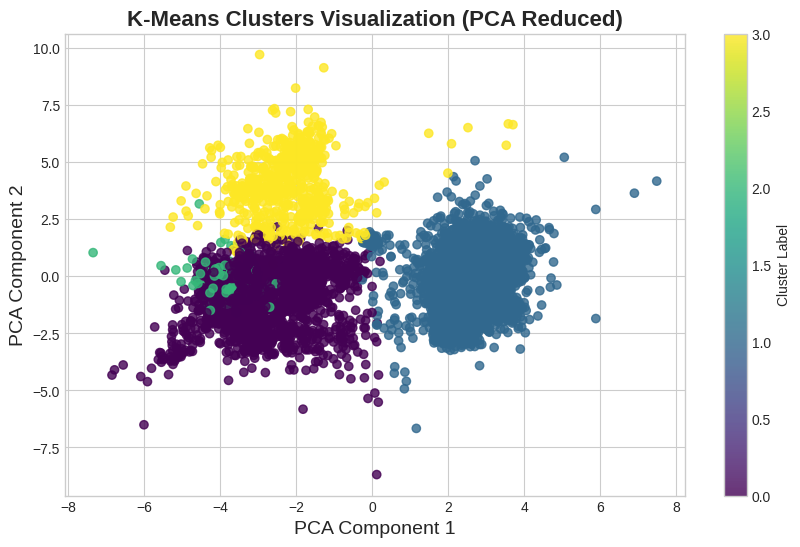

In [27]:
from sklearn.decomposition import PCA

# Initialize PCA to reduce dimensions to 3 components
pca = PCA(n_components=3)  # We will reduce the data to 3 principal components
pca_components = pca.fit_transform(scaled_features)  # Fit PCA on scaled features and transform them

# Create a 2D scatter plot to visualize the clusters
plt.figure(figsize=(10, 6))  # Set the figure size for the plot

# Scatter plot of the first two PCA components, coloring by cluster labels
plt.scatter(pca_components[:, 0], pca_components[:, 1],
            c=cluster_labels, cmap='viridis', marker='o', alpha=0.8)

# Title and labels for the plot
plt.title('K-Means Clusters Visualization (PCA Reduced)', fontsize=16, fontweight='bold')
plt.xlabel('PCA Component 1', fontsize=14)  # Label for x-axis
plt.ylabel('PCA Component 2', fontsize=14)  # Label for y-axis

# Add a color bar to indicate cluster labels
plt.colorbar(label='Cluster Label')  # Color bar showing which color corresponds to which cluster

# Show the plot
plt.show()  # Display the scatter plot


**Visualization in 3D**

In [28]:
import plotly.express as px  # Importing Plotly Express for easy visualization
from sklearn.cluster import KMeans  # Importing KMeans for clustering
from sklearn.decomposition import PCA  # Importing PCA for dimensionality reduction

# Set the number of clusters for K-Means
n_clusters = 4

# Initialize K-Means clustering with the specified number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = kmeans.fit_predict(scaled_features)  # Fit the model and predict cluster labels

# Dimensionality Reduction using PCA for 3D visualization
pca = PCA(n_components=3)  # Initialize PCA to reduce to 3 components
pca_components = pca.fit_transform(scaled_features)  # Fit and transform the scaled features

# Create a DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(data=pca_components, columns=['PCA Component 1', 'PCA Component 2', 'PCA Component 3'])
pca_df['Cluster'] = cluster_labels  # Add the cluster labels to the DataFrame

# Define custom colors for the clusters
colors = ['red', 'black', 'green', 'blue']

# Create a 3D scatter plot using Plotly
fig = px.scatter_3d(
    pca_df,
    x='PCA Component 1',  # X-axis
    y='PCA Component 2',  # Y-axis
    z='PCA Component 3',  # Z-axis
    color='Cluster',  # Color by cluster label
    title='K-Means Clusters Visualization (PCA Reduced)',  # Title of the plot
    labels={'Cluster': 'Cluster Label'},  # Label for the color legend
    color_discrete_sequence=colors,  # Set the colors for clusters
    opacity=0.8  # Set the opacity of the markers
)

# Update the markers in the plot
fig.update_traces(marker=dict(size=8), selector=dict(mode='markers'))

# Customize the layout of the plot
fig.update_layout(
    scene=dict(
        xaxis_title='PCA Component 1',  # Title for X-axis
        yaxis_title='PCA Component 2',  # Title for Y-axis
        zaxis_title='PCA Component 3',  # Title for Z-axis
        # Set background color for axes
        xaxis=dict(showbackground=True, backgroundcolor='lightgrey'),
        yaxis=dict(showbackground=True, backgroundcolor='lightgrey'),
        zaxis=dict(showbackground=True, backgroundcolor='lightgrey')
    ),
    title_font=dict(size=24, color='darkblue'),  # Font size and color for the title
    legend_title_font=dict(size=16),  # Font size for the legend title
    margin=dict(l=0, r=0, b=0, t=40)  # Set margins for the plot
)

# Display the plot
fig.show()  # Show the interactive 3D plot


**Feature Contribution Analysis**

*Analyzing feature contributions helps understand the characteristics that differentiate clusters.*

In [29]:
# Calculate PCA loadings by multiplying the PCA components by the square root of explained variance
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Identify the most important feature for each PCA component
# The most important feature is the one with the highest absolute loading value
most_important_features = [np.argmax(np.abs(loadings[:, i])) for i in range(loadings.shape[1])]

# Output the indices of the most important features for each PCA component
print("Most important features by PCA component:", most_important_features)


Most important features by PCA component: [21, 11, 17]


**Cluster Evaluation Metrics**

   Number of Clusters  Davies-Bouldin Index  Calinski-Harabasz Index
0                   2              1.308099              3284.605925
1                   3              1.265539              2194.578237
2                   4              1.320163              2092.702640
3                   5              1.347381              1961.893190
4                   6              1.375461              1927.660209
5                   7              1.496833              1718.046116
6                   8              1.450328              1621.548645
7                   9              1.438528              1473.069216


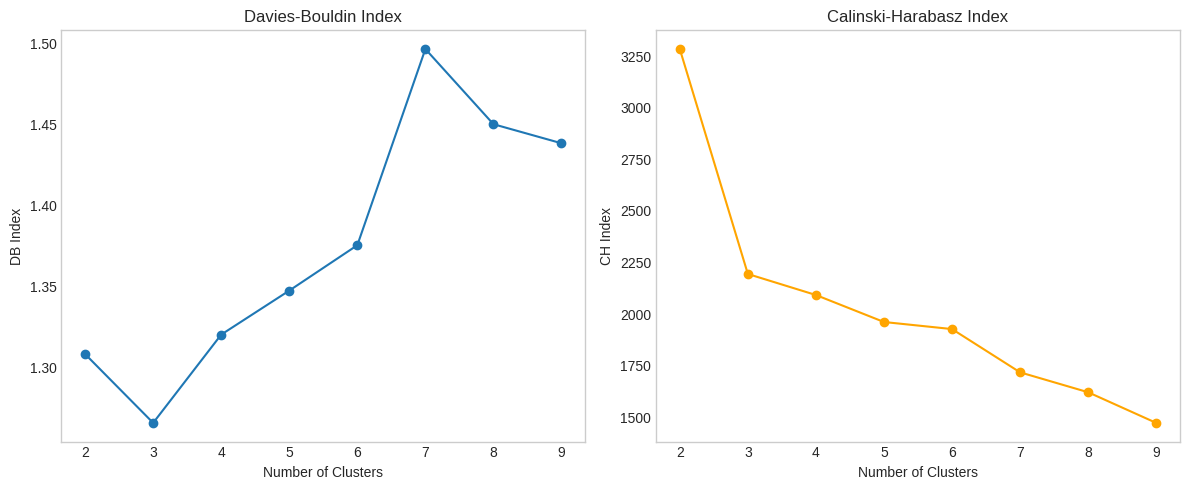

In [30]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Define the range of clusters to evaluate
cluster_range = range(2, 10)
db_index = []  # List to store Davies-Bouldin Index values
ch_index = []  # List to store Calinski-Harabasz Index values

# Evaluate clustering for each number of clusters in the defined range
for n_clusters in cluster_range:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)

    # Fit the KMeans model and predict cluster labels
    cluster_labels = kmeans.fit_predict(scaled_features)

    # Calculate the Davies-Bouldin Index for the current clustering
    db = davies_bouldin_score(scaled_features, cluster_labels)
    db_index.append(db)  # Store the DB index

    # Calculate the Calinski-Harabasz Index for the current clustering
    ch = calinski_harabasz_score(scaled_features, cluster_labels)
    ch_index.append(ch)  # Store the CH index

# Create a DataFrame to hold the metrics for easy analysis and visualization
metrics_df = pd.DataFrame({
    'Number of Clusters': cluster_range,
    'Davies-Bouldin Index': db_index,
    'Calinski-Harabasz Index': ch_index
})

# Display the DataFrame with clustering metrics
print(metrics_df)

# Plotting the metrics for visualization
plt.figure(figsize=(12, 5))

# Plot Davies-Bouldin Index
plt.subplot(1, 2, 1)  # Create a subplot for DB Index
plt.plot(metrics_df['Number of Clusters'], metrics_df['Davies-Bouldin Index'], marker='o')
plt.title('Davies-Bouldin Index')  # Title of the plot
plt.xlabel('Number of Clusters')  # X-axis label
plt.ylabel('DB Index')  # Y-axis label
plt.grid()  # Add grid for better readability

# Plot Calinski-Harabasz Index
plt.subplot(1, 2, 2)  # Create a subplot for CH Index
plt.plot(metrics_df['Number of Clusters'], metrics_df['Calinski-Harabasz Index'], marker='o', color='orange')
plt.title('Calinski-Harabasz Index')  # Title of the plot
plt.xlabel('Number of Clusters')  # X-axis label
plt.ylabel('CH Index')  # Y-axis label
plt.grid()  # Add grid for better readability

# Adjust layout to prevent overlap and show the plots
plt.tight_layout()
plt.show()


In [31]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Calculate the Davies-Bouldin Index for the clustering results
davies_bouldin = davies_bouldin_score(scaled_features, cluster_labels)

# Calculate the Calinski-Harabasz Index for the clustering results
calinski_harabasz = calinski_harabasz_score(scaled_features, cluster_labels)

# Print the results of the clustering evaluation metrics
print(f'Davies-Bouldin Index: {davies_bouldin}')  # Indicates the average similarity ratio of each cluster
print(f'Calinski-Harabasz Index: {calinski_harabasz}')  # Measures the ratio of the sum of between-cluster dispersion to within-cluster dispersion


Davies-Bouldin Index: 1.4385280101084765
Calinski-Harabasz Index: 1473.0692160191159


**Comparison with Other Clustering Algorithms **

In [32]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Initialize Agglomerative Clustering with the optimal number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)

# Fit the model to the scaled features and predict the cluster labels
agg_labels = agg_clustering.fit_predict(scaled_features)

# Calculate the silhouette score for the Agglomerative Clustering results
silhouette_agg = silhouette_score(scaled_features, agg_labels)

# Print the silhouette score, which indicates the quality of clustering
print(f'Silhouette Score for Agglomerative Clustering: {silhouette_agg}')  # Higher scores indicate better-defined clusters


Silhouette Score for Agglomerative Clustering: 0.3473759430752922


In [33]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Initialize DBSCAN with specified parameters: eps (maximum distance between samples) and min_samples (minimum number of samples to form a cluster)
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model to the scaled features and predict the cluster labels
dbscan_labels = dbscan.fit_predict(scaled_features)

# Filter out noise points represented by the label '-1'
filtered_labels = dbscan_labels[dbscan_labels != -1]
filtered_data = scaled_features[dbscan_labels != -1]

# Calculate the silhouette score for the remaining points; applicable only if there is more than one cluster
silhouette_dbscan = silhouette_score(filtered_data, filtered_labels) if len(set(filtered_labels)) > 1 else 'Not Applicable'

# Print the silhouette score to assess the quality of the DBSCAN clustering
print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')  # Higher scores indicate better-defined clusters; 'Not Applicable' if no clusters are found


Silhouette Score for DBSCAN: 0.23414681117060518


Silhouette Score for Agglomerative Clustering: 0.3473759430752922
Silhouette Score for DBSCAN: 0.23414681117060518


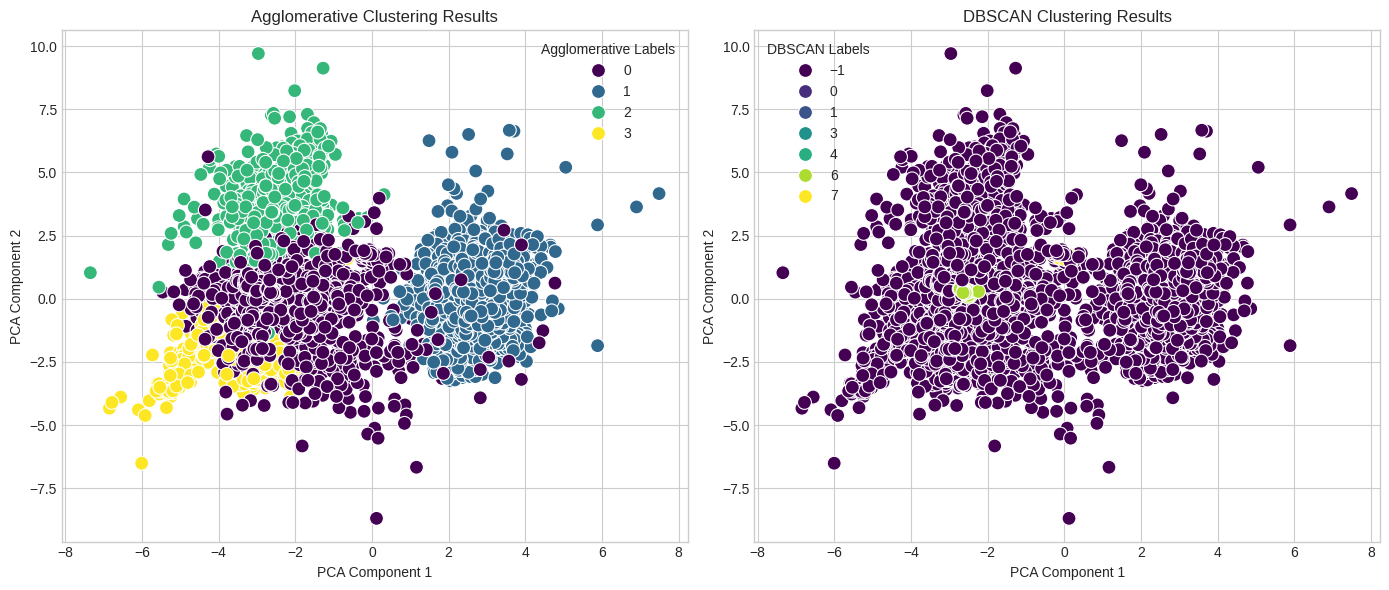

In [34]:
# Import necessary libraries for clustering and visualization
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the optimal number of clusters for Agglomerative Clustering
optimal_k = 4  # This value should be determined from previous analysis

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
agg_labels = agg_clustering.fit_predict(scaled_features)  # Fit the model and predict cluster labels

# Calculate silhouette score for Agglomerative Clustering to evaluate cluster quality
silhouette_agg = silhouette_score(scaled_features, agg_labels)
print(f'Silhouette Score for Agglomerative Clustering: {silhouette_agg}')

# Apply DBSCAN for density-based clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)  # Fit the model and predict cluster labels

# Filter out noise points represented by -1 to calculate silhouette score for DBSCAN
filtered_labels = dbscan_labels[dbscan_labels != -1]
filtered_data = scaled_features[dbscan_labels != -1]
# Calculate silhouette score; applicable only if more than one cluster is detected
silhouette_dbscan = silhouette_score(filtered_data, filtered_labels) if len(set(filtered_labels)) > 1 else 'Not Applicable'
print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')

# Dimensionality Reduction with PCA for visualization purposes
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for plotting PCA components and cluster labels
pca_df = pd.DataFrame(data=pca_components, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['Agglomerative Labels'] = agg_labels  # Add Agglomerative cluster labels
pca_df['DBSCAN Labels'] = dbscan_labels  # Add DBSCAN cluster labels

# Plotting results of Agglomerative Clustering and DBSCAN
plt.figure(figsize=(14, 6))

# Visualization of Agglomerative Clustering results
plt.subplot(1, 2, 1)
sns.scatterplot(data=pca_df, x='PCA Component 1', y='PCA Component 2', hue='Agglomerative Labels', palette='viridis', s=100)
plt.title('Agglomerative Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Visualization of DBSCAN results
plt.subplot(1, 2, 2)
sns.scatterplot(data=pca_df, x='PCA Component 1', y='PCA Component 2', hue='DBSCAN Labels', palette='viridis', s=100)
plt.title('DBSCAN Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
